## **Aim : To build an ANN model for performing classification on a given dataset.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()


features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])

features_train, features_test = features_train / 255., features_test / 255.
print(features_train)
print(targets_train)

11501568/11490434 [==============================] - 0s 0us/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


In [3]:
torch_x_train = torch.from_numpy(features_train)
torch_y_train = torch.from_numpy(targets_train)


torch_x_test = torch.from_numpy(features_test)
torch_y_test = torch.from_numpy(targets_test)

In [4]:
from  torch.utils.data import TensorDataset
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train_data=TensorDataset(torch_x_train,torch_y_train)
test_data=TensorDataset(torch_x_test,torch_y_test)

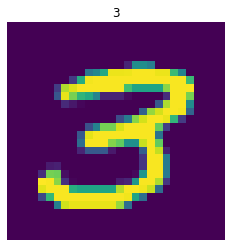

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size,shuffle=False)

plt.imshow(features_train[179].reshape(28,28))
plt.axis('off')
plt.title(str(targets_train[179]))
plt.savefig('graph.png')
plt.show()

In [7]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        # HL1 with relu activation
        out = self.relu(self.layer1(x))
        # HL2 with relu activation
        out = self.relu(self.layer2(out))
        # Output layer with LogSoftmax activation
        out = self.layer3(out)
        return out

input_dim = 28*28
hidden_dim = 150 
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)
print(model)

loss = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


ANNModel(
  (layer1): Linear(in_features=784, out_features=150, bias=True)
  (layer2): Linear(in_features=150, out_features=150, bias=True)
  (layer3): Linear(in_features=150, out_features=10, bias=True)
  (relu): ReLU()
)


In [8]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()
        
        output=model(train)

        error = loss(output, labels)
        # Calculating gradients
        error.backward()
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            predicted=[]
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                output=model(test)

                total=len(labels)
                
                prediction= torch.max(output.data, 1)[1]
         
                correct=(prediction==labels).sum()

            accuracy = 100 * correct / float(total)
    
            loss_list.append(error.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, error.data, accuracy))

Iteration: 500 Loss: 0.7675273418426514 Accuracy: 80.0 %
Iteration: 1000 Loss: 0.5196858048439026 Accuracy: 87.0 %
Iteration: 1500 Loss: 0.5738586783409119 Accuracy: 86.0 %
Iteration: 2000 Loss: 0.29143276810646057 Accuracy: 89.0 %
Iteration: 2500 Loss: 0.1956893801689148 Accuracy: 90.0 %
Iteration: 3000 Loss: 0.32292553782463074 Accuracy: 91.0 %
Iteration: 3500 Loss: 0.25366494059562683 Accuracy: 92.0 %
Iteration: 4000 Loss: 0.28844529390335083 Accuracy: 92.0 %
Iteration: 4500 Loss: 0.4029995799064636 Accuracy: 91.0 %


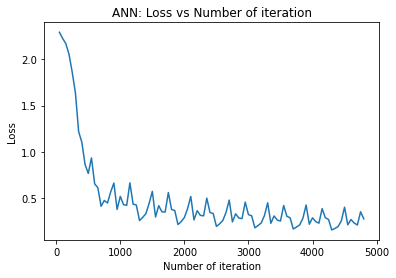

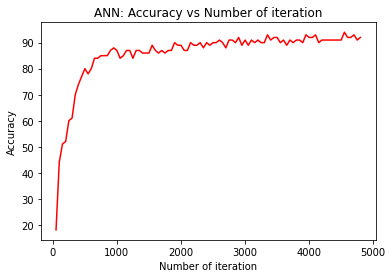

In [9]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()